In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('credit_risk.csv')

In [3]:
df

,customer_id,age,income,employment_status,credit_score,loan_amount,interest_rate,loan_duration,debt_to_income_ratio,num_late_payments,loan_status
0,1,56,67800,Employed,554,46246,28.28,25,13.83,4,1
1,2,69,60761,Employed,732,23498,29.52,26,19.23,4,1
2,3,46,114626,Employed,804,4990,23.62,33,30.08,2,0
3,4,32,138368,Employed,326,18552,27.88,34,29.06,9,1
4,5,60,194735,Employed,819,2367,24.35,11,22.70,4,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,72,52208,Self-Employed,521,46683,25.10,59,39.93,8,0
14996,14997,30,71998,Employed,755,44954,13.04,21,35.40,5,0
14997,14998,26,76994,Employed,658,40945,24.59,24,33.99,7,0
14998,14999,73,79895,Employed,709,5995,25.87,20,18.16,7,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           15000 non-null  int64  
 1   age                   15000 non-null  int64  
 2   income                15000 non-null  int64  
 3   employment_status     15000 non-null  object 
 4   credit_score          15000 non-null  int64  
 5   loan_amount           15000 non-null  int64  
 6   interest_rate         15000 non-null  float64
 7   loan_duration         15000 non-null  int64  
 8   debt_to_income_ratio  15000 non-null  float64
 9   num_late_payments     15000 non-null  int64  
 10  loan_status           15000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

customer_id             0
age                     0
income                  0
employment_status       0
credit_score            0
loan_amount             0
interest_rate           0
loan_duration           0
debt_to_income_ratio    0
num_late_payments       0
loan_status             0
dtype: int64

In [6]:
df.describe()

,customer_id,age,income,credit_score,loan_amount,interest_rate,loan_duration,debt_to_income_ratio,num_late_payments,loan_status
count,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,45.999400,109096.730267,575.14440,25676.934200,16.526325,32.598200,34.961167,4.500667,0.511800
std,4330.271354,16.412736,52044.480372,157.69841,14079.574432,7.839128,15.521186,14.358883,2.882826,0.499877
min,1.000000,18.000000,20005.000000,300.00000,1001.000000,3.000000,6.000000,10.020000,0.000000,0.000000
25%,3750.750000,32.000000,63723.500000,439.00000,13564.750000,9.780000,19.000000,22.530000,2.000000,0.000000
50%,7500.500000,46.000000,109208.500000,577.00000,25632.500000,16.440000,33.000000,35.030000,5.000000,1.000000
75%,11250.250000,60.000000,154038.250000,710.00000,37909.500000,23.440000,46.000000,47.290000,7.000000,1.000000
max,15000.000000,74.000000,199971.000000,849.00000,49997.000000,30.000000,59.000000,60.000000,9.000000,1.000000


In [ ]:
#Ploting the target variable (loan_status) distribution:

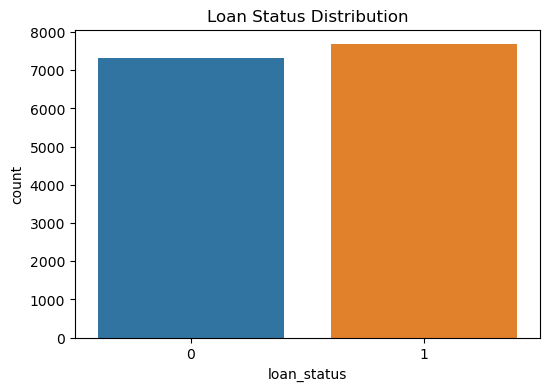

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()


Now that the data is explored, let's clean and prepare it for modeling. We'll:
1) Remove unnecessary columns
2) Encode categorical variables
3) Scale numerical data (for better model performance)

In [8]:
#This is just an identifier — not useful for prediction.
df.drop('customer_id', axis=1, inplace=True)


In [9]:
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate', 
            'loan_duration', 'debt_to_income_ratio', 'num_late_payments']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [11]:
df.head()


,age,income,credit_score,loan_amount,interest_rate,loan_duration,debt_to_income_ratio,num_late_payments,loan_status,employment_status_Self-Employed,employment_status_Unemployed
0,0.609340,-0.793516,-0.134086,1.460964,1.499410,-0.489554,-1.471693,-0.173678,1,False,False
1,1.401434,-0.928770,0.994689,-0.154764,1.657596,-0.425123,-1.095607,-0.173678,1,False,False
2,0.000037,0.106245,1.451272,-1.469336,0.904936,0.025888,-0.339952,-0.867465,0,False,False
3,-0.852988,0.562447,-1.579932,-0.506064,1.448382,0.090318,-0.410990,1.560789,1,False,False
4,0.853061,1.645537,1.546393,-1.655640,0.998062,-1.391577,-0.853937,-0.173678,0,False,False


In [12]:
# Convert True/False to 0/1
df['employment_status_Self-Employed'] = df['employment_status_Self-Employed'].astype(int)
df['employment_status_Unemployed'] = df['employment_status_Unemployed'].astype(int)


In [13]:
df

,age,income,credit_score,loan_amount,interest_rate,loan_duration,debt_to_income_ratio,num_late_payments,loan_status,employment_status_Self-Employed,employment_status_Unemployed
0,0.609340,-0.793516,-0.134086,1.460964,1.499410,-0.489554,-1.471693,-0.173678,1,0,0
1,1.401434,-0.928770,0.994689,-0.154764,1.657596,-0.425123,-1.095607,-0.173678,1,0,0
2,0.000037,0.106245,1.451272,-1.469336,0.904936,0.025888,-0.339952,-0.867465,0,0,0
3,-0.852988,0.562447,-1.579932,-0.506064,1.448382,0.090318,-0.410990,1.560789,1,0,0
4,0.853061,1.645537,1.546393,-1.655640,0.998062,-1.391577,-0.853937,-0.173678,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,1.584225,-1.093115,-0.343353,1.492003,1.093739,1.701074,0.346057,1.213896,0,1,0
14996,-0.974849,-0.712851,1.140542,1.369197,-0.444749,-0.747275,0.030563,0.173215,0,0,0
14997,-1.218570,-0.616853,0.525423,1.084449,1.028679,-0.553984,-0.067638,0.867002,0,0,0
14998,1.645155,-0.561110,0.848836,-1.397953,1.191968,-0.811705,-1.170128,0.867002,0,0,0


 spliting the data into training and testing sets:
 80% for training
 20% for testing

In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12000, 10), (3000, 10), (12000,), (3000,))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Create the model
log_reg = LogisticRegression()

# Step 2: Train the model on training data
log_reg.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.64

Confusion Matrix:
[[926 532]
 [559 983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1458
           1       0.65      0.64      0.64      1542

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



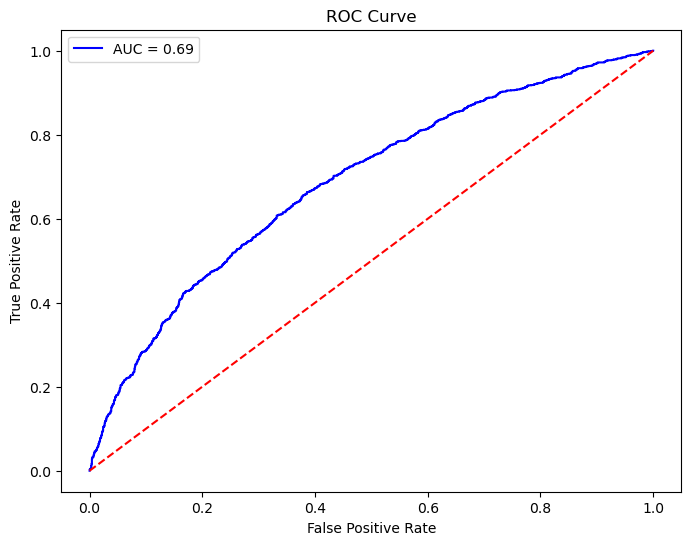

In [16]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Building and Training a Decision Tree Model

we will 
Import and create the model
Fit the model on training data
Make predictions on test data
Evaluate the model
Plot the tree


Accuracy: 0.63

Confusion Matrix:
[[925 533]
 [569 973]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1458
           1       0.65      0.63      0.64      1542

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



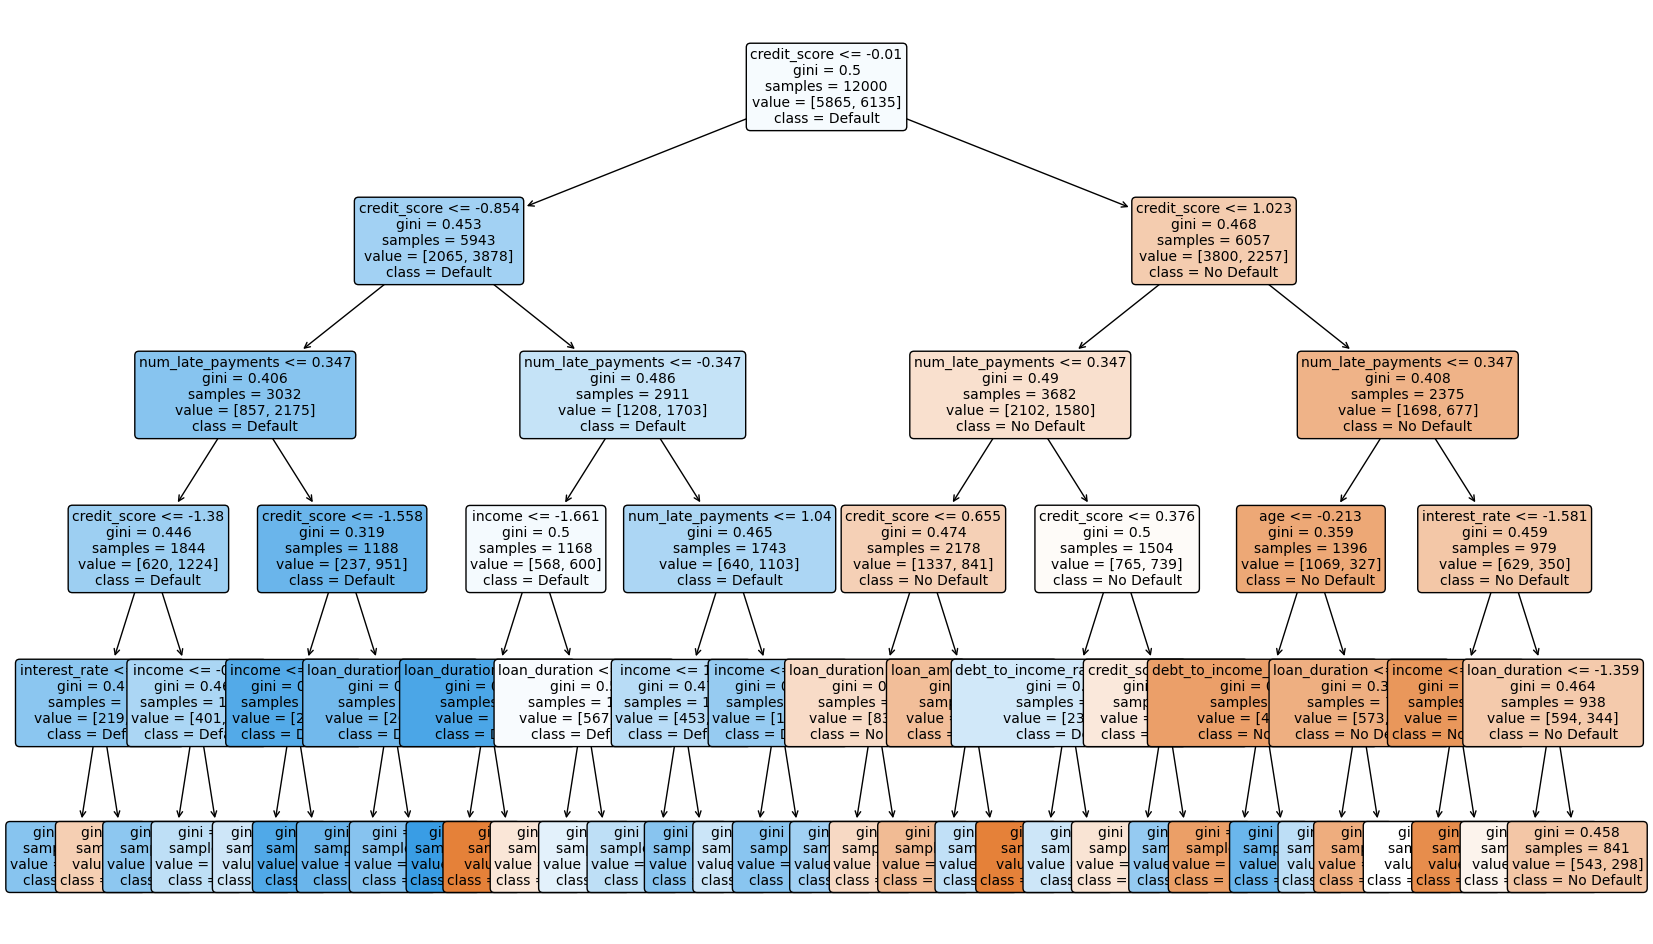

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Step 1: Create the model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Step 2: Train the model
dt.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_dt = dt.predict(X_test)

# Step 4: Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_dt:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix_dt)
print('\nClassification Report:')
print(class_report_dt)

# Step 5: Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True, rounded=True, fontsize=10)
plt.show()


The Decision Tree model achieved an accuracy of 63%, which is better than random guessing. However, it indicates room for improvement, possibly due to data imbalance or model complexity. We can try tuning hyperparameters or using a more advanced model to boost performance.

In [ ]:
#now Building and Training a Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Step 2: Train the model
rf.fit(X_train, y_train)

# Step 3: Predict the loan status
y_pred_rf = rf.predict(X_test)

# Step 4: Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.64


The Random Forest model achieved an accuracy of 64%, which is better than the Decision Tree's 63%. This shows that combining multiple trees helped the model capture more patterns.

In [ ]:
#Summary

We used Logistic Regression, Decision Tree, and Random Forest models to predict credit risk. Logistic Regression achieved 64% accuracy with an AUC of 0.69, showing a good ability to distinguish defaulters from non-defaulters. The Decision Tree model gave 63% accuracy, highlighting key decision-making patterns. Random Forest improved stability and gave 64% accuracy by reducing overfitting through ensemble learning. Further tuning or adding more features could enhance model performance."